# Corona Infection Diagnosis using Bayesian Network

## [Data Set](https://www.kaggle.com/datasets/S%C3%ADrio-Libanes/covid19)

badimp: dmpmvble

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/coronapp.csv") # pre-pocessed
data_covid_19 = data[data["covid_19"] == 1]
data_no_covid_19 = data[data["covid_19"] == 0].sample(n=300,replace=False)

data = pd.concat([data_covid_19, data_no_covid_19]).sample(frac=1)


In [3]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.estimators import HillClimbSearch
hc = HillClimbSearch(data)
best_model = hc.estimate()

model = BayesianNetwork(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

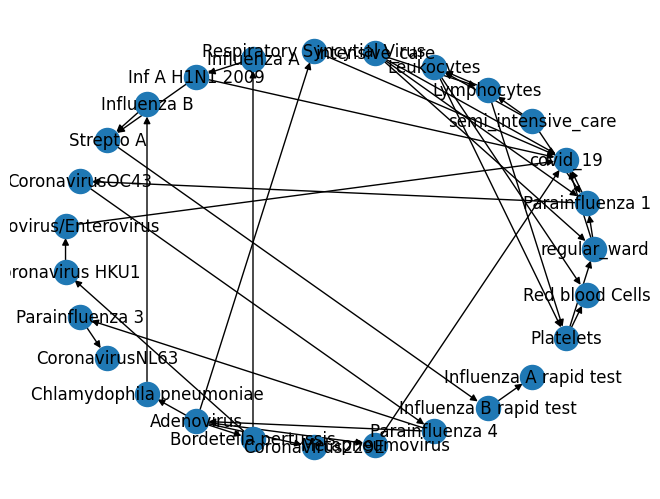

In [4]:
import networkx as nx
nx.draw_circular(model, with_labels=True)


In [5]:
model.fit(data, estimator=MaximumLikelihoodEstimator)

In [6]:
for x in data.columns:
    print("CPD of",x,": ")
    print(model.get_cpds(x))

CPD of covid_19 : 
+-----------------------------+-----+
| Inf A H1N1 2009             | ... |
+-----------------------------+-----+
| Metapneumovirus             | ... |
+-----------------------------+-----+
| Parainfluenza 1             | ... |
+-----------------------------+-----+
| Respiratory Syncytial Virus | ... |
+-----------------------------+-----+
| Rhinovirus/Enterovirus      | ... |
+-----------------------------+-----+
| intensive_care              | ... |
+-----------------------------+-----+
| regular_ward                | ... |
+-----------------------------+-----+
| covid_19(0)                 | ... |
+-----------------------------+-----+
| covid_19(1)                 | ... |
+-----------------------------+-----+
CPD of regular_ward : 
+-----------------+-----+-----------------------------+
| Platelets       | ... | Platelets(3.03757905960083) |
+-----------------+-----+-----------------------------+
| intensive_care  | ... | intensive_care(1)           |
+-----------

+--------------------------------+-----+-------------------------------+
| Leukocytes                     | ... | Leukocytes(3.779036045074463) |
+--------------------------------+-----+-------------------------------+
| Lymphocytes                    | ... | Lymphocytes(3.16706657409668) |
+--------------------------------+-----+-------------------------------+
| Platelets(-2.062515497207642)  | ... | 0.010526315789473684          |
+--------------------------------+-----+-------------------------------+
| Platelets(-1.936897397041321)  | ... | 0.010526315789473684          |
+--------------------------------+-----+-------------------------------+
| Platelets(-1.911773800849915)  | ... | 0.010526315789473684          |
+--------------------------------+-----+-------------------------------+
| Platelets(-1.823841094970703)  | ... | 0.010526315789473684          |
+--------------------------------+-----+-------------------------------+
| Platelets(-1.761032104492188)  | ... | 0.01052631

+-----+-------------------------------+
| ... | Leukocytes(3.779036045074463) |
+-----+-------------------------------+
| ... | Platelets(3.03757905960083)   |
+-----+-------------------------------+
| ... | 0.01098901098901099           |
+-----+-------------------------------+
| ... | 0.01098901098901099           |
+-----+-------------------------------+
| ... | 0.01098901098901099           |
+-----+-------------------------------+
| ... | 0.01098901098901099           |
+-----+-------------------------------+
| ... | 0.01098901098901099           |
+-----+-------------------------------+
| ... | 0.01098901098901099           |
+-----+-------------------------------+
| ... | 0.01098901098901099           |
+-----+-------------------------------+
| ... | 0.01098901098901099           |
+-----+-------------------------------+
| ... | 0.01098901098901099           |
+-----+-------------------------------+
| ... | 0.01098901098901099           |
+-----+-------------------------------+
